# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
import json
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

616

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Base URL for API call
base_url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 

# Create empty lists to hold data from api
city_names = []
country = []
date = []
cloudiness = []
max_temp = []
wind_speed = []
humidity = []
lat = []
lng = []

# Begin API Calls

print(f"Beginning Data Retrieval")
print(f"***********************************")

# Start counter 
counter = 1

# Loop through cities in the list
for city in cities: 
    url = base_url + '&q=' + city.replace(' ','+')
    print(f"Processing Record - {counter} | {city}")
    print(url)
    
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_names.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        
        
        
        # API rate limit
        time.sleep(1.01)
        
    # Skip if no match found
    except:
        print("City not found. Skipping...")
    pass
    
    # Add to counter
    counter+= 1
        
              
# Provide message indicating Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval
***********************************
Processing Record - 1 | busselton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f88a57488b8ca8a85134b9ea51b6f8ba&q=busselton
Processing Record - 2 | hobart
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f88a57488b8ca8a85134b9ea51b6f8ba&q=hobart
Processing Record - 3 | ushuaia
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f88a57488b8ca8a85134b9ea51b6f8ba&q=ushuaia
Processing Record - 4 | liku
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f88a57488b8ca8a85134b9ea51b6f8ba&q=liku
Processing Record - 5 | bathsheba
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f88a57488b8ca8a85134b9ea51b6f8ba&q=bathsheba
Processing Record - 6 | roma
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f88a57488b8ca8a85134b9ea51b6f8ba&q=roma
Processing Record - 7 | vaini
http://api.openweathermap.org/data/2.5/weather?units=Impe

Processing Record - 56 | uray
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f88a57488b8ca8a85134b9ea51b6f8ba&q=uray
Processing Record - 57 | cherskiy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f88a57488b8ca8a85134b9ea51b6f8ba&q=cherskiy
Processing Record - 58 | qaanaaq
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f88a57488b8ca8a85134b9ea51b6f8ba&q=qaanaaq
Processing Record - 59 | yantal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f88a57488b8ca8a85134b9ea51b6f8ba&q=yantal
Processing Record - 60 | syracuse
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f88a57488b8ca8a85134b9ea51b6f8ba&q=syracuse
Processing Record - 61 | thompson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f88a57488b8ca8a85134b9ea51b6f8ba&q=thompson
Processing Record - 62 | bethel
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f88a57488b8ca8a85134b9ea51b6f8ba&q=bet

Processing Record - 111 | taolanaro
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f88a57488b8ca8a85134b9ea51b6f8ba&q=taolanaro
City not found. Skipping...
Processing Record - 112 | de land
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f88a57488b8ca8a85134b9ea51b6f8ba&q=de+land
Processing Record - 113 | mys shmidta
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f88a57488b8ca8a85134b9ea51b6f8ba&q=mys+shmidta
City not found. Skipping...
Processing Record - 114 | seoul
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f88a57488b8ca8a85134b9ea51b6f8ba&q=seoul
Processing Record - 115 | longyearbyen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f88a57488b8ca8a85134b9ea51b6f8ba&q=longyearbyen
Processing Record - 116 | asau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f88a57488b8ca8a85134b9ea51b6f8ba&q=asau
City not found. Skipping...
Processing Record - 117 | carnarvo

Processing Record - 166 | rocha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f88a57488b8ca8a85134b9ea51b6f8ba&q=rocha
Processing Record - 167 | atuona
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f88a57488b8ca8a85134b9ea51b6f8ba&q=atuona
Processing Record - 168 | ngukurr
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f88a57488b8ca8a85134b9ea51b6f8ba&q=ngukurr
City not found. Skipping...
Processing Record - 169 | lavrentiya
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f88a57488b8ca8a85134b9ea51b6f8ba&q=lavrentiya
Processing Record - 170 | biak
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f88a57488b8ca8a85134b9ea51b6f8ba&q=biak
Processing Record - 171 | saskylakh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f88a57488b8ca8a85134b9ea51b6f8ba&q=saskylakh
Processing Record - 172 | saldanha
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f

Processing Record - 221 | kahului
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f88a57488b8ca8a85134b9ea51b6f8ba&q=kahului
Processing Record - 222 | samarai
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f88a57488b8ca8a85134b9ea51b6f8ba&q=samarai
Processing Record - 223 | luban
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f88a57488b8ca8a85134b9ea51b6f8ba&q=luban
Processing Record - 224 | yumen
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f88a57488b8ca8a85134b9ea51b6f8ba&q=yumen
Processing Record - 225 | sao joao da barra
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f88a57488b8ca8a85134b9ea51b6f8ba&q=sao+joao+da+barra
Processing Record - 226 | stege
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f88a57488b8ca8a85134b9ea51b6f8ba&q=stege
Processing Record - 227 | alofi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f88a57488b8ca8a85134b9

City not found. Skipping...
Processing Record - 276 | bardstown
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f88a57488b8ca8a85134b9ea51b6f8ba&q=bardstown
Processing Record - 277 | karaul
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f88a57488b8ca8a85134b9ea51b6f8ba&q=karaul
City not found. Skipping...
Processing Record - 278 | salinopolis
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f88a57488b8ca8a85134b9ea51b6f8ba&q=salinopolis
Processing Record - 279 | codrington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f88a57488b8ca8a85134b9ea51b6f8ba&q=codrington
Processing Record - 280 | gushikawa
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f88a57488b8ca8a85134b9ea51b6f8ba&q=gushikawa
Processing Record - 281 | porto novo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f88a57488b8ca8a85134b9ea51b6f8ba&q=porto+novo
Processing Record - 282 | platanos
http://api.op

Processing Record - 331 | souillac
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f88a57488b8ca8a85134b9ea51b6f8ba&q=souillac
Processing Record - 332 | hihifo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f88a57488b8ca8a85134b9ea51b6f8ba&q=hihifo
City not found. Skipping...
Processing Record - 333 | hervey bay
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f88a57488b8ca8a85134b9ea51b6f8ba&q=hervey+bay
Processing Record - 334 | arraial do cabo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f88a57488b8ca8a85134b9ea51b6f8ba&q=arraial+do+cabo
Processing Record - 335 | khani
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f88a57488b8ca8a85134b9ea51b6f8ba&q=khani
Processing Record - 336 | urumqi
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f88a57488b8ca8a85134b9ea51b6f8ba&q=urumqi
City not found. Skipping...
Processing Record - 337 | dubuque
http://api.openweatherma

Processing Record - 386 | ishigaki
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f88a57488b8ca8a85134b9ea51b6f8ba&q=ishigaki
Processing Record - 387 | kavieng
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f88a57488b8ca8a85134b9ea51b6f8ba&q=kavieng
Processing Record - 388 | villanueva
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f88a57488b8ca8a85134b9ea51b6f8ba&q=villanueva
Processing Record - 389 | dangtu
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f88a57488b8ca8a85134b9ea51b6f8ba&q=dangtu
Processing Record - 390 | champerico
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f88a57488b8ca8a85134b9ea51b6f8ba&q=champerico
Processing Record - 391 | fort nelson
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f88a57488b8ca8a85134b9ea51b6f8ba&q=fort+nelson
Processing Record - 392 | havelock
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f88a574

Processing Record - 441 | cuite
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f88a57488b8ca8a85134b9ea51b6f8ba&q=cuite
Processing Record - 442 | sobolevo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f88a57488b8ca8a85134b9ea51b6f8ba&q=sobolevo
Processing Record - 443 | sosnovo-ozerskoye
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f88a57488b8ca8a85134b9ea51b6f8ba&q=sosnovo-ozerskoye
Processing Record - 444 | manaure
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f88a57488b8ca8a85134b9ea51b6f8ba&q=manaure
Processing Record - 445 | damghan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f88a57488b8ca8a85134b9ea51b6f8ba&q=damghan
Processing Record - 446 | porbandar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f88a57488b8ca8a85134b9ea51b6f8ba&q=porbandar
Processing Record - 447 | pekalongan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f88

Processing Record - 496 | daitari
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f88a57488b8ca8a85134b9ea51b6f8ba&q=daitari
Processing Record - 497 | korcula
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f88a57488b8ca8a85134b9ea51b6f8ba&q=korcula
Processing Record - 498 | vangaindrano
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f88a57488b8ca8a85134b9ea51b6f8ba&q=vangaindrano
Processing Record - 499 | kurchum
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f88a57488b8ca8a85134b9ea51b6f8ba&q=kurchum
Processing Record - 500 | uryupinsk
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f88a57488b8ca8a85134b9ea51b6f8ba&q=uryupinsk
Processing Record - 501 | vallenar
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f88a57488b8ca8a85134b9ea51b6f8ba&q=vallenar
Processing Record - 502 | alyangula
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f88a57488b

Processing Record - 550 | annau
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f88a57488b8ca8a85134b9ea51b6f8ba&q=annau
Processing Record - 551 | udachnyy
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f88a57488b8ca8a85134b9ea51b6f8ba&q=udachnyy
Processing Record - 552 | mangan
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f88a57488b8ca8a85134b9ea51b6f8ba&q=mangan
Processing Record - 553 | murray bridge
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f88a57488b8ca8a85134b9ea51b6f8ba&q=murray+bridge
Processing Record - 554 | voyvozh
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f88a57488b8ca8a85134b9ea51b6f8ba&q=voyvozh
Processing Record - 555 | saint anthony
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f88a57488b8ca8a85134b9ea51b6f8ba&q=saint+anthony
Processing Record - 556 | senekal
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f88a5748

Processing Record - 604 | rungata
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f88a57488b8ca8a85134b9ea51b6f8ba&q=rungata
City not found. Skipping...
Processing Record - 605 | katsuura
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f88a57488b8ca8a85134b9ea51b6f8ba&q=katsuura
Processing Record - 606 | huntington
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f88a57488b8ca8a85134b9ea51b6f8ba&q=huntington
Processing Record - 607 | nelidovo
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f88a57488b8ca8a85134b9ea51b6f8ba&q=nelidovo
Processing Record - 608 | ulladulla
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f88a57488b8ca8a85134b9ea51b6f8ba&q=ulladulla
Processing Record - 609 | port lavaca
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=f88a57488b8ca8a85134b9ea51b6f8ba&q=port+lavaca
Processing Record - 610 | port blair
http://api.openweathermap.org/data/2.5/weat

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [16]:
# Create dataframe
city_weather_pd = {"City":city_names, "Cloudiness":cloudiness, "Country":country, "Date":date, "Humidity": humidity,
                   "Lat":lat, "Lng":lng, "Max Temp": max_temp, "Wind Speed":wind_speed}

# Data count
city_weather_df = pd.DataFrame(city_weather_pd)
city_weather_df.count()

City          551
Cloudiness    551
Country       551
Date          551
Humidity      551
Lat           551
Lng           551
Max Temp      551
Wind Speed    551
dtype: int64

In [17]:
# Save data frame to CSV
city_weather_df.to_csv('city_weather.csv')

# Display data frame head 
city_weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Busselton,97,AU,1567461030,65,-33.64,115.35,51.01,22.30
1,Hobart,20,AU,1567460868,76,-42.88,147.33,54.00,6.93
2,Ushuaia,75,AR,1567461033,96,-54.81,-68.31,35.60,39.15
3,Liku,89,ID,1567461034,76,-0.73,119.89,81.23,9.86
4,Bathsheba,40,BB,1567461035,70,13.22,-59.52,86.00,17.22


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

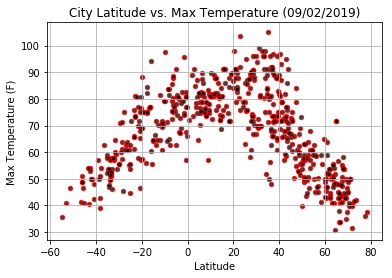

In [18]:
plt.scatter(city_weather_df["Lat"], city_weather_df["Max Temp"], marker="o", color = 'k', s=20, alpha=0.75,edgecolors='red')
plt.title("City Latitude vs. Max Temperature (09/02/2019)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Latitude_vs_MaxTemp.png")
plt.show()

#### Latitude vs. Humidity Plot

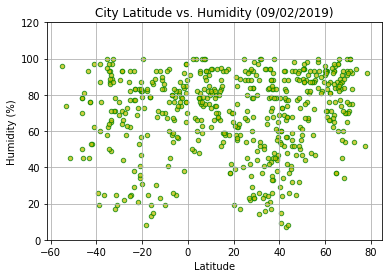

In [24]:
plt.scatter(city_weather_df["Lat"], city_weather_df["Humidity"], marker="o", color = 'y', s=20, alpha=0.75,edgecolors='green')
plt.ylim(0, 120)
plt.title("City Latitude vs. Humidity (09/02/2019)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Latitude_vs_Humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

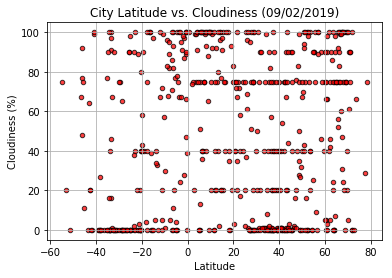

In [20]:
plt.scatter(city_weather_df["Lat"], city_weather_df["Cloudiness"], marker="o", color = 'r', s=20, alpha=0.75,edgecolors='black')
plt.title("City Latitude vs. Cloudiness (09/02/2019)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Latitude_vs_Cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

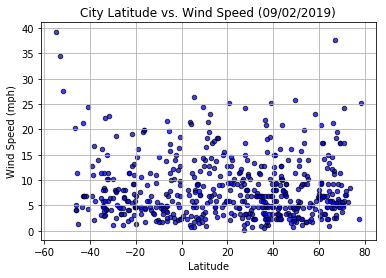

In [21]:
plt.scatter(city_weather_df["Lat"], city_weather_df["Wind Speed"],  marker="o", color = 'b', s=20, alpha=0.75,edgecolors='black')
plt.title("City Latitude vs. Wind Speed (09/02/2019)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig("Latitude_vs_WindSpeed.png")
plt.show()